# Evaluating the risk-return performance of AAPL and MSFT in 2024

<h2 style="color:yellow;">---- 1. Data Acquisition ----</h2>

<h2 style="color:lightblue;">Identifying Data Source and Confirming Credibility:</h2>

* **Source**: Yahoo Finance (via automated web scrape using the `yfinance` Python library (unofficial Yahoo Finance interface)
* **Credibility**: Yahoo Finance aggregates public market data; widely used in financial analysis
* **Retrieval method**: `yfinacne` library using the `Ticker` and `history` methods
* **Scope**: Apple Inc. (`AAPL`) and Microsoft Corp. (`MSFT`), one-year period (2024)
* **Verification**: Confirmed 
* **Storage**: Raw DataFrame exported unchanged as `raw_data/aapl_raw.csv` and `raw_data/msft_raw.csv` before cleaning

<h2 style="color:lightblue;">Importing Libraries</h2>

All Python libraries used. Individual functions imported to avoid clutter and minimise load time.

In [103]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

pd.set_option("display.float_format", "{:,.2f}".format)


<h2 style="color:lightblue;">Importing Tickers Using yfinance</h2>

##### `AAPL`

In [104]:
aapl = yf.Ticker("AAPL")
aapl_df = yf.download(tickers="AAPL", start="2024-01-01", end="2024-12-31", auto_adjust=True)
aapl_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


##### `MSFT`

In [105]:
msft = yf.Ticker("MSFT")
msft_df = yf.download(tickers="MSFT", start="2024-01-01", end="2024-12-31", auto_adjust=True)
msft_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


<h2 style="color:yellow;">---- 2. Data Inspection ----</h2>

<h2 style="color:lightblue">Shape Summaries</h2>

##### `AAPL`

In [106]:
print("Shape summary:")
print(f" - Length = {aapl_df.shape[0]} rows")
print(f" - Width = {aapl_df.shape[1]} columns")

Shape summary:
 - Length = 251 rows
 - Width = 5 columns


##### `MSFT`

In [107]:
print("Shape summary:")
print(f" - Length = {msft_df.shape[0]} rows")
print(f" - Width = {msft_df.shape[1]} columns")

Shape summary:
 - Length = 251 rows
 - Width = 5 columns


<h2 style="color:lightblue;">Column Summaries</h2>

##### `AAPL`

In [108]:
print("Column summary:")
aapl_df_columns = list(aapl_df.columns.values)
print(f" - Column names: {aapl_df_columns}")
print(" - Column types:")
for col, types in aapl_df.dtypes.items():
    print(f"    {col} = {types}")

Column summary:
 - Column names: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
 - Column types:
    ('Close', 'AAPL') = float64
    ('High', 'AAPL') = float64
    ('Low', 'AAPL') = float64
    ('Open', 'AAPL') = float64
    ('Volume', 'AAPL') = int64


##### `MSFT`

In [109]:
print("Column summary:")
msft_df_columns = list(msft_df.columns.values)
print(f" - Column names: {msft_df_columns}")
print(" - Column types:")
for col, types in msft_df.dtypes.items():
    print(f"    {col} = {types}")

Column summary:
 - Column names: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT')]
 - Column types:
    ('Close', 'MSFT') = float64
    ('High', 'MSFT') = float64
    ('Low', 'MSFT') = float64
    ('Open', 'MSFT') = float64
    ('Volume', 'MSFT') = int64


<h2 style="color:lightblue;">Missing Values</h2>

(All columns return 0 missing values for each dataframe `aapl_df` and `msft_df`)

##### `AAPL`

In [110]:
print("Missing values per column:")
print(aapl_df.isnull().sum())

Missing values per column:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


##### `MSFT`

In [111]:
print("Missing values per column:")
print(msft_df.isnull().sum())

Missing values per column:
Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


<h2 style="color:lightblue;">Statistical Analysis</h2>

##### `AAPL`

In [112]:
display(Markdown("###  MSFT STDev"))
display(round(aapl_df.std(axis="rows"),2))
display(Markdown("### Min:"))
display(round(aapl_df.min(axis="rows"),2))
display(Markdown("### Max:"))
display(round(aapl_df.max(axis="rows"),2))
display(Markdown("### Mean:"))
display(round(aapl_df.mean(axis="rows"),2))



###  MSFT STDev

Price   Ticker
Close   AAPL             25.53
High    AAPL             25.60
Low     AAPL             25.15
Open    AAPL             25.34
Volume  AAPL     30,764,411.81
dtype: float64

### Min:

Price   Ticker
Close   AAPL            163.82
High    AAPL            165.21
Low     AAPL            162.91
Open    AAPL            164.17
Volume  AAPL     23,234,700.00
dtype: float64

### Max:

Price   Ticker
Close   AAPL             258.10
High    AAPL             259.18
Low     AAPL             256.72
Open    AAPL             257.28
Volume  AAPL     318,679,900.00
dtype: float64

### Mean:

Price   Ticker
Close   AAPL            205.87
High    AAPL            207.56
Low     AAPL            203.88
Open    AAPL            205.60
Volume  AAPL     57,177,003.19
dtype: float64

##### `MSFT`

In [113]:
display(Markdown("###  MSFT STDev"))
display(round(msft_df.std(axis="rows"),2))
display(Markdown("### Min:"))
display(round(msft_df.min(axis="rows"),2))
display(Markdown("### Max:"))
display(round(msft_df.max(axis="rows"),2))
display(Markdown("### Mean:"))
display(round(msft_df.mean(axis="rows"),2))



###  MSFT STDev

Price   Ticker
Close   MSFT            18.10
High    MSFT            18.02
Low     MSFT            17.99
Open    MSFT            18.02
Volume  MSFT     7,389,197.82
dtype: float64

### Min:

Price   Ticker
Close   MSFT           363.03
High    MSFT           367.28
Low     MSFT           361.79
Open    MSFT           364.23
Volume  MSFT     7,164,500.00
dtype: float64

### Max:

Price   Ticker
Close   MSFT            463.24
High    MSFT            464.02
Low     MSFT            460.17
Open    MSFT            462.69
Volume  MSFT     64,263,700.00
dtype: float64

### Mean:

Price   Ticker
Close   MSFT            416.45
High    MSFT            419.73
Low     MSFT            412.85
Open    MSFT            416.50
Volume  MSFT     20,615,866.53
dtype: float64

<h2 style="color:lightblue;">First/Last 5 Entries</h2>

##### `AAPL`

In [114]:
display(Markdown("### First 5 entries:"))
display(aapl_df.head())
display(Markdown("### Last 5 entries:"))
display(aapl_df.tail())

### First 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


### Last 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.37,254.75,252.55,253.87,40858800
2024-12-24,257.29,257.30,254.39,254.59,23234700
2024-12-26,258.10,259.18,256.72,257.28,27237100
2024-12-27,254.69,257.78,252.16,256.92,42355300
2024-12-30,251.31,252.60,249.86,251.34,35557500


##### `MSFT`

In [115]:
display(Markdown("### First 5 entries:"))
display(msft_df.head())
display(Markdown("### Last 5 entries:"))
display(msft_df.tail())

### First 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


### Last 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-12-23,432.87,435.26,430.46,434.35,19152500
2024-12-24,436.93,437.20,431.82,432.27,7164500
2024-12-26,435.72,438.53,434.24,436.68,8194200
2024-12-27,428.18,432.84,424.02,432.22,18117700
2024-12-30,422.51,425.21,419.59,423.73,13158700


<h2 style="color:lightblue;">Duplicate Entries</h2>

##### `AAPL`

In [116]:
display(Markdown(f"Number of duplicated rows: `{int(aapl_df.duplicated().sum())}`"))

Number of duplicated rows: `0`

##### `MSFT`

In [117]:
display(Markdown(f"Number of duplicated rows: `{int(msft_df.duplicated().sum())}`"))

Number of duplicated rows: `0`

<h2 style="color:lightblue;">Chronological Order Check</h2>

##### `AAPL`

In [118]:
# Checking index type
display(Markdown(f"Index type: `{type(aapl_df.index).__name__}`"))

Index type: `DatetimeIndex`

In [119]:
# Checking chronological order
chronological_order = aapl_df.index.is_monotonic_increasing
display(Markdown(f"AAPL dates are chronological: `{chronological_order}`"))

AAPL dates are chronological: `True`

##### `MSFT`

In [120]:
# Checking index type
display(Markdown(f"Index type: `{type(msft_df.index).__name__}`"))

Index type: `DatetimeIndex`

In [121]:
# Checking chronological order
chronological_order = msft_df.index.is_monotonic_increasing
display(Markdown(f"MSFT dates are chronological: `{chronological_order}`"))

MSFT dates are chronological: `True`

<h2 style="color:yellow;">---- 3. Data Cleaning ----</h2>

<h2 style="color:lightblue;">Formatting Missing Values</h2>

N/A for both `AAPL` and `MSFT` dataframes - no missing values as confirmed above

<h2 style="color:lightblue;">Range and Logic Validation</h2>

##### `AAPL`

In [122]:
aapl_df_valid = (aapl_df["Low"] <= aapl_df["Open"]) & (aapl_df["Open"] <= aapl_df["High"])
print(aapl_df_valid.all())

Ticker
AAPL    True
dtype: bool


##### `MSFT`

In [123]:
msft_df_valid = (msft_df["Low"] <= msft_df["Open"]) & (msft_df["Open"] <= msft_df["High"])
print(msft_df_valid.all())

Ticker
MSFT    True
dtype: bool


<h2 style="color:lightblue;">Format Standardistation</h2>

##### `AAPL`

In [124]:
display(yf.Ticker("AAPL").history(start="2024-01-01", end="2024-01-09"), aapl_df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,185.58,186.86,182.35,184.08,82488700,0.00,0.00
2024-01-03 00:00:00-05:00,182.67,184.32,181.89,182.70,58414500,0.00,0.00
2024-01-04 00:00:00-05:00,180.62,181.55,179.36,180.38,71983600,0.00,0.00
2024-01-05 00:00:00-05:00,180.46,181.23,178.66,179.66,62379700,0.00,0.00
2024-01-08 00:00:00-05:00,180.56,184.04,179.98,184.00,59144500,0.00,0.00


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


##### `MSFT`

In [125]:
display(yf.Ticker("MSFT").history(start="2024-01-01", end="2024-01-09"), msft_df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,369.06,371.07,362.06,366.11,25258600,0.00,0.00
2024-01-03 00:00:00-05:00,364.27,368.46,363.78,365.84,23083500,0.00,0.00
2024-01-04 00:00:00-05:00,365.91,368.31,362.45,363.21,20901500,0.00,0.00
2024-01-05 00:00:00-05:00,364.23,367.28,361.79,363.03,21004600,0.00,0.00
2024-01-08 00:00:00-05:00,364.56,370.38,364.27,369.88,23134000,0.00,0.00


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


<h2 style="color:lightblue;">Outlier Inspection</h2>

Visual inspection of outliers for each column: Low, High, Open, Close and Volume.

##### `AAPL`

<Axes: title={'center': 'AAPL Daily Price Summary'}, xlabel='Date'>

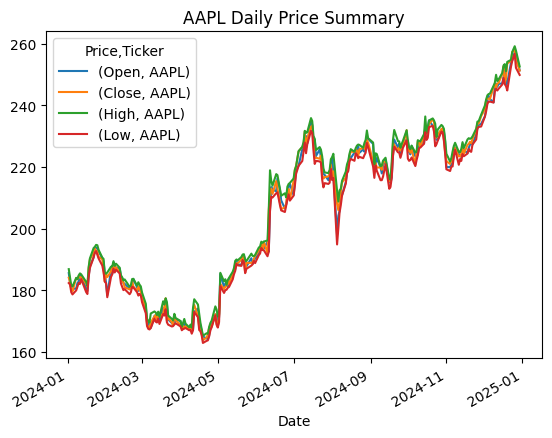

In [126]:
aapl_df.plot(
    y=["Open","Close","High", "Low"],
    title="AAPL Daily Price Summary")


##### `MSFT`

<Axes: title={'center': 'MSFT Daily Price Summary'}, xlabel='Date'>

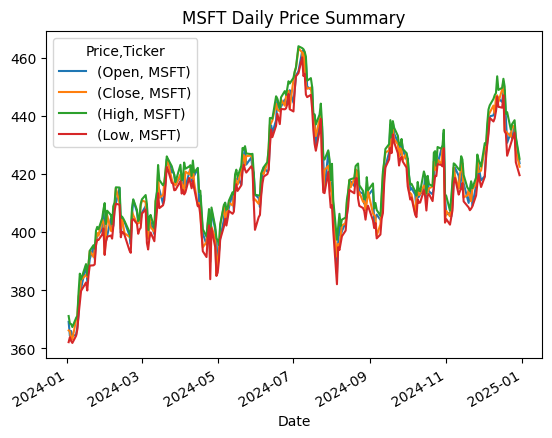

In [127]:
msft_df.plot(
    y=["Open","Close","High", "Low"],
    title="MSFT Daily Price Summary")

<h2 style="color:lightblue;">Combined Volume Check</h2>

* Combining volume checks allows for easeier visual inspection of outliers as common spikes indicate general market behvaiour. 
* Independent spikes are checked against Yahoo Finance and MarketWatch

Ticker,AAPL,MSFT
Date,,
2024-01-02,82488700,25258600
2024-01-03,58414500,23083500
2024-01-04,71983600,20901500
2024-01-05,62379700,21004600
2024-01-08,59144500,23134000


<Axes: title={'center': 'AAPL and MSFT Ticker Volume'}, xlabel='Date'>

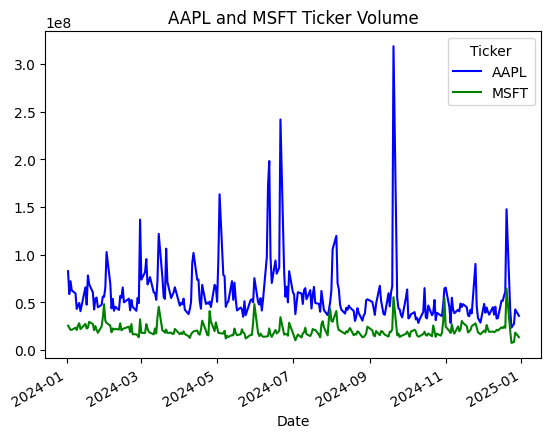

In [128]:
combined_vol = pd.concat([aapl_df["Volume"], msft_df["Volume"]], axis=1)
display(
    combined_vol.head(),
    combined_vol.plot(
        y=["AAPL", "MSFT"],
        title="AAPL and MSFT Ticker Volume",
        color=["Blue","Green"]))

<h2 style="color:yellow;">---- 4. Data Transformation - Derived Metrics ----</h2>

<h2 style="color:lightblue;">Range</h>

In [129]:
# Creating `range_daily_df` DataFrame using "High" and "Low" columns from MSFT and AAPL
range_daily_df = pd.DataFrame({
    "MSFT - Daily Range": msft_df[("High", "MSFT")] - msft_df[("Low", "MSFT")],
    "AAPL - Daily Range": aapl_df[("High", "AAPL")] - aapl_df[("Low", "AAPL")]
})

# Using `range_daily_df` to create weekly mean range DataFrame and renaming columns
range_weekly_df = range_daily_df.resample("W").mean()
range_weekly_df.rename(columns={
    "MSFT - Daily Range": "MSFT - Weekly Mean Range",
    "AAPL - Daily Range": "AAPL - Weekly Mean Range"},
    inplace=True
)

In [130]:
display(range_daily_df.head(), range_weekly_df.head())

,MSFT - Daily Range,AAPL - Daily Range
Date,,
2024-01-02,9.01,4.51
2024-01-03,4.69,2.43
2024-01-04,5.85,2.19
2024-01-05,5.49,2.57
2024-01-08,6.11,4.07


,MSFT - Weekly Mean Range,AAPL - Weekly Mean Range
Date,,
2024-01-07,6.26,2.93
2024-01-14,6.55,2.77
2024-01-21,5.12,3.07
2024-01-28,5.11,2.58
2024-02-04,9.01,4.15


<h2 style="color:lightblue;">Plotting Range</h>

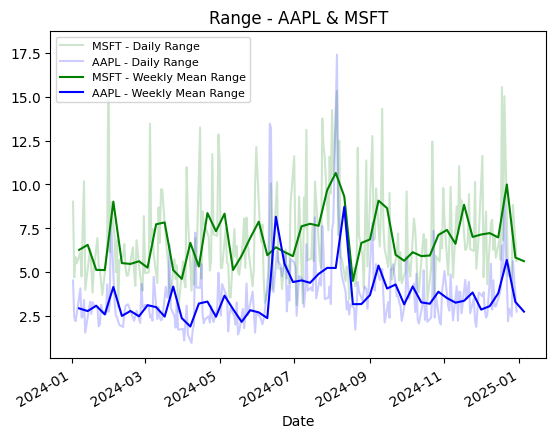

In [131]:
# Assigning `range_daily_df` plot to object `ax1`
ax1 = range_daily_df.plot(
    title="Daily Range",
    color=["Green","Blue"],
    alpha=0.2
)

# Plotting `range_weekly_df` over `ax1` plot
range_weekly_df.plot(
    title="Range - AAPL & MSFT",
    color=["Green","Blue"],
    ax=ax1
)

plt.legend(fontsize=8)

<h2 style="color:lightblue;">Return</h2>

In [132]:
# Creating `return_daily_df` using "Close" and "Open" columns from MSFT and AAPL
return_daily_df = pd.DataFrame({
    "MSFT - Daily Returns": msft_df[("Close", "MSFT")] - msft_df[("Open", "MSFT")],
    "AAPL - Daily Returns": aapl_df[("Close", "AAPL")] - aapl_df[("Open", "AAPL")]
})

# Using `return_daily_df` to create weekly mean return DataFrame and renaming columns
return_weekly_df = return_daily_df.resample("W").mean()
return_weekly_df.rename(columns={
                        "MSFT - Daily Returns": "MSFT - Weekly Mean Return",
                         "AAPL - Daily Returns": "AAPL - Weekly Mean Return"},
                         inplace=True)


In [133]:
display(return_daily_df.head(), return_weekly_df.head())

,MSFT - Daily Returns,AAPL - Daily Returns
Date,,
2024-01-02,-2.95,-1.50
2024-01-03,1.57,0.03
2024-01-04,-2.69,-0.24
2024-01-05,-1.20,-0.80
2024-01-08,5.32,3.44


,MSFT - Weekly Mean Return,AAPL - Weekly Mean Return
Date,,
2024-01-07,-1.32,-0.63
2024-01-14,3.39,1.08
2024-01-21,0.78,1.90
2024-01-28,0.15,-0.41
2024-02-04,-0.01,0.60


<h2 style="color:lightblue;">Plotting Return</h2>

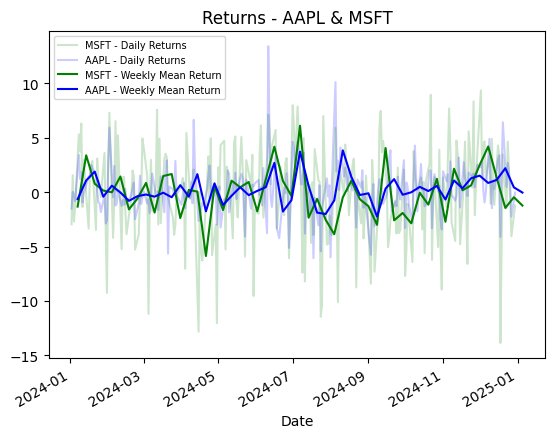

In [134]:
ax = return_daily_df.plot(
    title="Returns - AAPL & MSFT",
    color=["Green","Blue"],
    alpha=0.2
)

return_weekly_df.plot(
    title="Returns - AAPL & MSFT",
    color=["Green","Blue"],
    ax=ax
)

plt.legend(fontsize=7)

#### To do:
* **Percentages** - relative changes compared to a base value or prior period
* **Rolling means** - windowed sequences of past observations to smooth noise or measure trends
* **Documentation**

<h2 style="color:lightblue;">Return-Volatility Ratio</h2>

In [135]:
# Creating `ret_vol_ratio_daily` DataFrame using derived return and range DataFrames
ret_vol_ratio_daily = pd.DataFrame({
    "AAPL - Daily R/V Ratio": return_daily_df["AAPL - Daily Returns"]/range_daily_df["AAPL - Daily Range"],
    "MSFT - Daily R/V Ratio": return_daily_df["MSFT - Daily Returns"]/range_daily_df["MSFT - Daily Range"],
})

ret_vol_ratio_weekly = pd.DataFrame({
    "AAPL - Weekly R/V Ratio": return_weekly_df["AAPL - Weekly Mean Return"]/range_weekly_df["AAPL - Weekly Mean Range"],
    "MSFT - Weekly R/V Ratio": return_weekly_df["MSFT - Weekly Mean Return"]/range_weekly_df["MSFT - Weekly Mean Range"],
})

In [136]:
display(ret_vol_ratio_daily.head(), ret_vol_ratio_weekly.head())

,AAPL - Daily R/V Ratio,MSFT - Daily R/V Ratio
Date,,
2024-01-02,-0.33,-0.33
2024-01-03,0.01,0.33
2024-01-04,-0.11,-0.46
2024-01-05,-0.31,-0.22
2024-01-08,0.85,0.87


,AAPL - Weekly R/V Ratio,MSFT - Weekly R/V Ratio
Date,,
2024-01-07,-0.21,-0.21
2024-01-14,0.39,0.52
2024-01-21,0.62,0.15
2024-01-28,-0.16,0.03
2024-02-04,0.15,-0.00


<h2 style="color:lightblue;">Plotting Return-Volatility Ratio</h2>

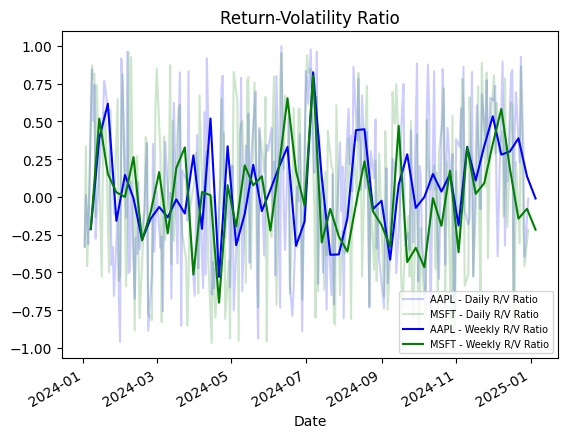

In [137]:
ax2 = ret_vol_ratio_daily.plot(
    title="Return-Volatility Ratio",
    color=["Blue","Green"],
    alpha=0.2
)

ret_vol_ratio_weekly.plot(
    title = "Return-Volatility Ratio",
    color = ["blue", "green"],
    ax=ax2
)

plt.legend(fontsize=7)

<h2 style="color:lightblue;">High-Low Ratio</h2>

In [138]:

high_low_ratio_daily = pd.DataFrame({
    "AAPL - Daily H/L Ratio": aapl_df["High","AAPL"]/aapl_df["Low","AAPL"],
    "MSFT - Daily H/L Ratio": msft_df["High","MSFT"]/msft_df["Low","MSFT"]
})

high_low_ratio_weekly = high_low_ratio_daily.resample("W").mean()
high_low_ratio_weekly.rename(columns={
    "AAPL - Daily H/L Ratio": "AAPL - Weekly Mean H/L Ratio",
    "MSFT - Daily H/L Ratio": "MSFT - Weekly Mean H/L Ratio"
});

In [139]:
high_low_ratio_weekly.head()

,AAPL - Daily H/L Ratio,MSFT - Daily H/L Ratio
Date,,
2024-01-07,1.02,1.02
2024-01-14,1.02,1.02
2024-01-21,1.02,1.01
2024-01-28,1.01,1.01
2024-02-04,1.02,1.02


<h2 style="color:lightblue;">Plotting High-Low Ratio</h2>

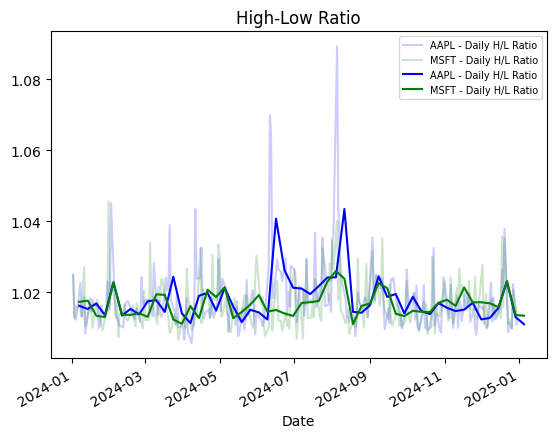

In [140]:
ax3 = high_low_ratio_daily.plot(
    title="High-Low Ratio",
    color=["Blue","Green"],
    alpha=0.2
)

high_low_ratio_weekly.plot(
    color=["Blue","Green"],
    ax=ax3    
)

plt.legend(fontsize=7)

<h2 style="color:lightblue;">Cumulative Percentage Change</h2>

In [154]:
cumulative_percentage_change_daily = pd.DataFrame({
    "AAPL - Daily Cumulative Percentage Change": (aapl_df["Close","AAPL"] / aapl_df["Open","AAPL"].iloc[0]-1) * 100,
    "MSFT - Daily Cumulative Percentage Change": (msft_df["Close","MSFT"] / msft_df["Open","MSFT"].iloc[0]-1) * 100
})

cumulative_percentage_change_weekly = cumulative_percentage_change_daily.resample("W").mean()
cumulative_percentage_change_weekly.rename({
    "AAPL - Daily Cumulative Percentage Change": "AAPL - Weekly Mean Cumulative Percentage Change",
    "MSFT - Daily Cumulative Percentage Change": "MSFT - Weekly Mean Cumulative Percentage Change"},
    inplace=True
);

<h2 style="color:lightblue;">Plotting Cumulative Percentage Change</h2>

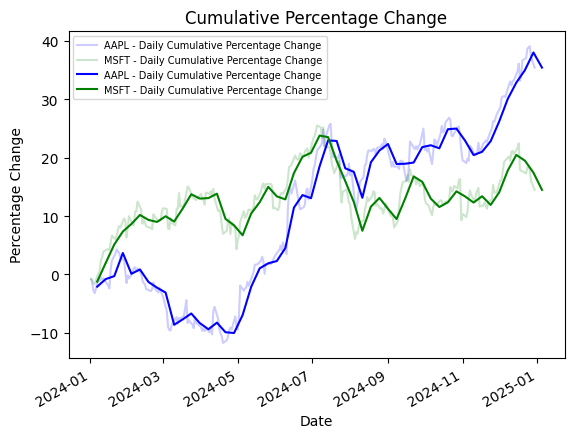

In [155]:
ax4 = cumulative_percentage_change_daily.plot(
    title="Cumulative Percentage Change",
    color=["Blue","Green"],
    alpha=0.2
)

cumulative_percentage_change_weekly.plot(
    color=["Blue","Green"],
    ax=ax4,
    ylabel="Percentage Change"
)

plt.legend(fontsize=7)

<h2 style="color:lightblue;">Daily Percentage Change</h2>

In [158]:
daily_percentage_change = pd.DataFrame({
    "AAPL - Daily Percentage Change":
        ((aapl_df["Close", "AAPL"] - aapl_df["Open", "AAPL"]) / aapl_df["Open","AAPL"]) * 100,
    "MSFT - Daily Percentage Change":
        ((msft_df["Close", "MSFT"] - msft_df["Open", "MSFT"]) / msft_df["Open","MSFT"]) * 100
})

weekly_percentage_change = daily_percentage_change.resample("W").mean()
weekly_percentage_change.rename(columns={
    "AAPL - Daily Percentage Change":
        "AAPL - Weekly Mean Percentage Change",
    "MSFT - Daily Percentage Change":
        "MSFT - Weekly Mean Percentage Change"},
    inplace=True
)

<h2 style="color:lightblue;">Plotting Daily Percentage Change</h2>

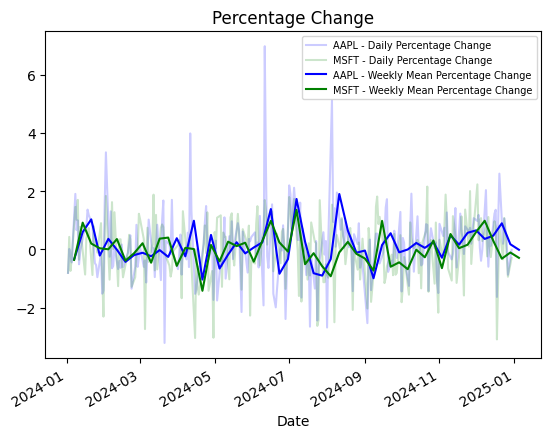

In [159]:
ax5 = daily_percentage_change.plot(
    title="Percentage Change",
    color=["Blue","Green"],
    alpha=0.2
)

weekly_percentage_change.plot(
    color=["Blue","Green"],
    ax=ax5
)

plt.legend(fontsize=7)